<div class="alert alert-block alert-info">
<font size="6"><b><center> Section 2</font></center>
<br>
<font size="6"><b><center> Fully-Connected, Feed-Forward Neural Network Examples </font></center>
</div>

# Example 1: A feedforward network with one hidden layer using torch.nn and simulated data

In developing (and training) a feedforward neural network, the developer needs to make many decisions, many of which are required when developing more complicated neural networks, such as CNN and RNN:

  - the depth of the network (i.e. number of layer) 
  - the width of the network (i.e. number of hidden units per layer)
  - the type of nonlinear activation function applied in each hidden layer
  - the type of activation function applied in the output layer
  - the loss function
  - the optimization algorithms
  - the regularization technique (*which we will consider in Section 3*)
  - number of epoch and batch size

Our first example uses simulated data, which has the advantage that we define our own data generating mechanism and can observe how a neural network can approximate the mechanism.

----

## Simulate and Visualize Data

Let's first consider an example with one explanatory variable.
<br><br>

The output is related to the input using the following function

$$y_i = 3x_{i,1} + x^2 exp(x_{i,1}) + \epsilon_i$$

where $\epsilon$ is an independently and identically distributed (i.i.d.) random variable and $i = 1,2,\dots,n$ is an index of examples (or observations)

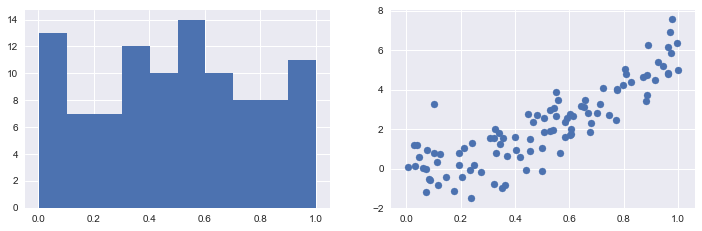

In [1]:
# In the following example, n=100

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

n = 100 # number of examples (or observations)

# Generate a set of n random numbers from a standard normal distribution
epsilon = np.random.randn(n)

# Generate a set of n random numbers from a uniform[0,1] distribution
x1 = np.random.uniform(0,1,n)

# Create the data generating mechanism
y = 3*x1 + np.power(x1,2)*np.exp(x1) + epsilon

stats.describe(y)
stats.describe(x1)

fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
sns.set()
#ax = sns.distplot(x1)
plt.hist(x1)

plt.subplot(2, 2, 2)
plt.scatter(x1, y)

**Note: Before training, `numpy array` needs to be converted to `PyTorch's tensors`**

In [2]:
type(x1)

numpy.ndarray

In [3]:
print(x1.shape)
print(y.shape)

(100,)
(100,)


In [4]:
# convert numpy array to tensor in shape of input size
import torch 

x1 = torch.from_numpy(x1.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()

In [5]:
print(x1.shape)
print(y.shape)

torch.Size([100, 1])
torch.Size([100, 1])


## Create a network: First Attempt

* Specify a network
* Define a loss function and choose an optimization algorithm
* Train the network

Our first network is a linear regression model

### Create a linear regression model

In [6]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()
        self.linearlayer1 = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = self.linearlayer1(x)      
        return y_pred

linearNet = LinearNet()
print(linearNet)

LinearNet(
  (linearlayer1): Linear(in_features=1, out_features=1, bias=True)
)


### Define Loss Function and Optimization Algorithm

In [7]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(linearNet.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

### Model training and print losses

0


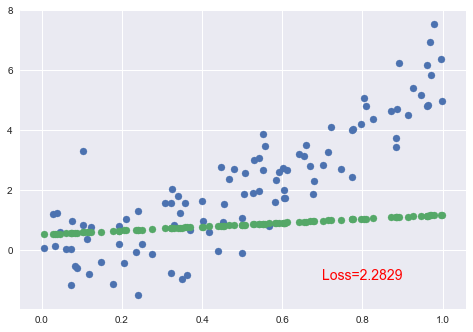

99


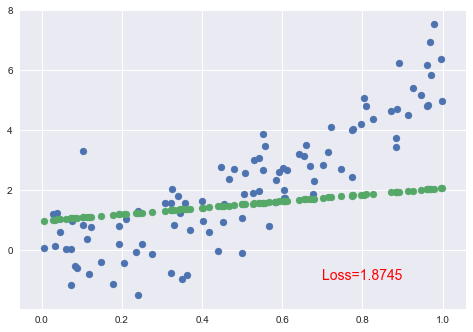

299


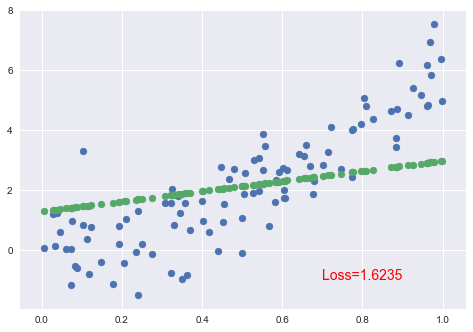

399


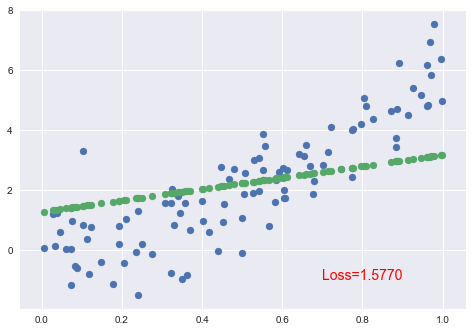

499


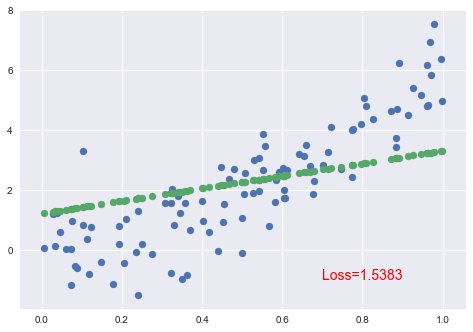

In [8]:
X     = Variable(x1)
y_data = Variable(y)

for epoch in range(500):
    y_pred = linearNet(X)
    loss = torch.sqrt(loss_func(y_pred, y_data))
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       
    
    # Plot the prediction and print out the loss
    if epoch in [0,99,299,399,499]:
        print(epoch)
        plt.cla()
        plt.scatter(x1.data.numpy(), y.data.numpy())
        #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=2)
        plt.scatter(x1.data.numpy(), y_pred.data.numpy())
        plt.text(0.7, -1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 14, 'color':  'red'})
        plt.pause(0.1)

plt.show()

## Create a Network: 2nd Attempt

### Define a Feed-forward network with 1 hidden layer

**Let's insert a computational graph here**

In [9]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class ffNet(nn.Module):
    def __init__(self):
        super(ffNet, self).__init__()
        self.linearCombo1 = torch.nn.Linear(1, 4) # z1 = W1*x1 + b1
        self.linearCombo2 = torch.nn.Linear(4, 1) # z2 = W2*h1 + b2

        self.relu = torch.nn.ReLU()
    
    
    def forward(self, x):
        h1 = self.relu(self.linearCombo1(x)) # the ReLU (non-linear activation function) is applied to the linear combination of the weights and input (x1)
        y_pred = self.linearCombo2(h1)      
        return y_pred

ffnet = ffNet()
print(ffnet)

ffNet(
  (linearCombo1): Linear(in_features=1, out_features=4, bias=True)
  (linearCombo2): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)


### Define loss function and optimization algorithm

In [10]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(ffnet.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

### Model Training

0


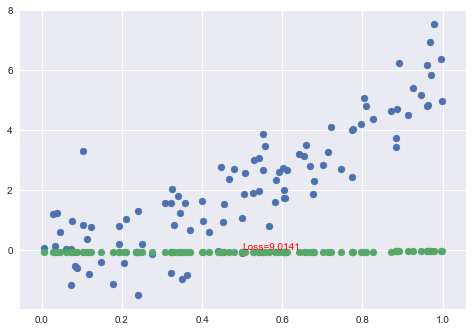

99


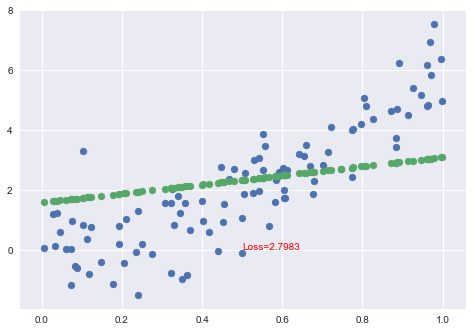

299


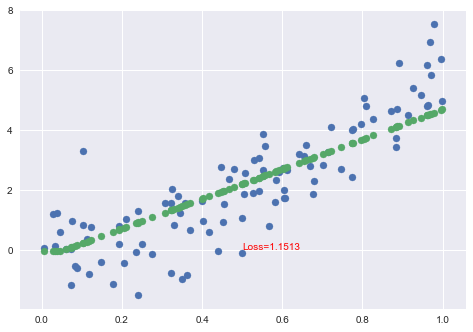

399


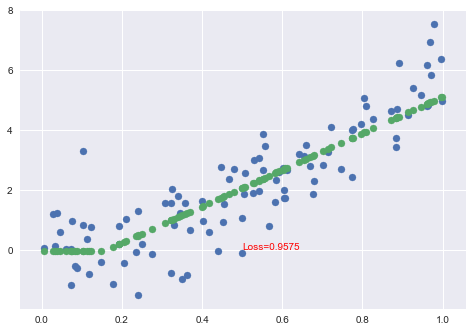

499


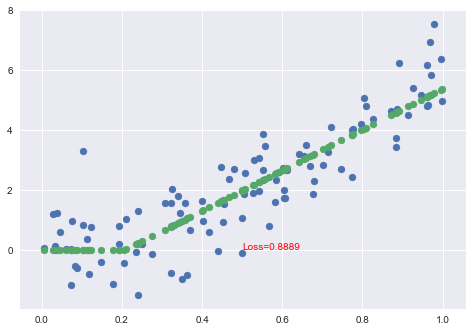

In [12]:
X      = Variable(x1)
y_data = Variable(y)

for epoch in range(500):
    y_pred = ffnet(X)
    loss = loss_func(y_pred, y_data) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       
    
    if epoch in [0,99,299,399,499]:
        print(epoch)
        plt.cla()
        plt.scatter(x1.data.numpy(), y.data.numpy())
        plt.scatter(x1.data.numpy(), y_pred.data.numpy())
        #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=2)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()

## Create a Network: 3rd Attempt

### Define a Feed-forward network with 2 hidden layers

In [18]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class ffNet(nn.Module):
    def __init__(self):
        super(ffNet, self).__init__()
        self.linearlayer1 = torch.nn.Linear(1, 8)
        self.linearlayer2 = torch.nn.Linear(8, 4)
        self.linearlayer3 = torch.nn.Linear(4, 1)

        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out1 = self.relu(self.linearlayer1(x))
        out2 = self.relu(self.linearlayer2(out1))
        y_pred = self.linearlayer3(out2)      
        return y_pred

ffnet2 = ffNet()
print(ffnet2)

ffNet(
  (linearlayer1): Linear(in_features=1, out_features=8, bias=True)
  (linearlayer2): Linear(in_features=8, out_features=4, bias=True)
  (linearlayer3): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)


### Define loss function and optimization algorithm

In [19]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(ffnet2.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

### Model Training

0


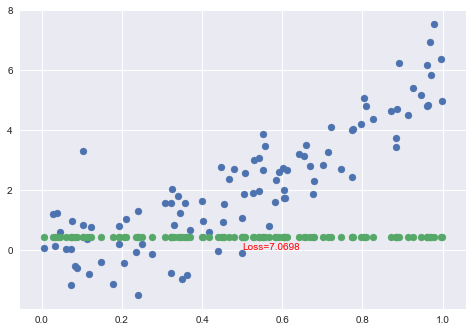

99


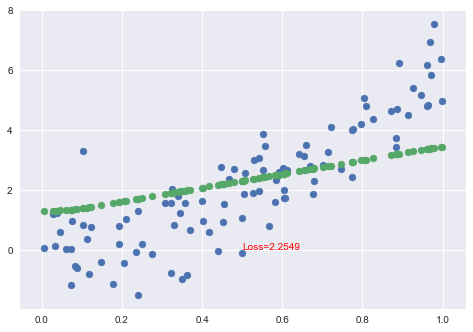

299


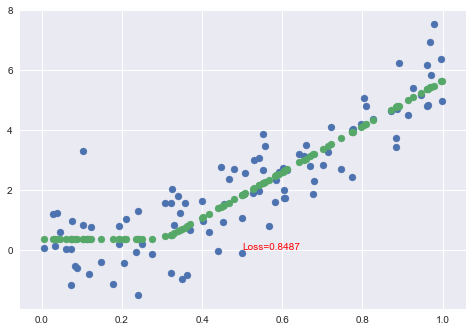

399


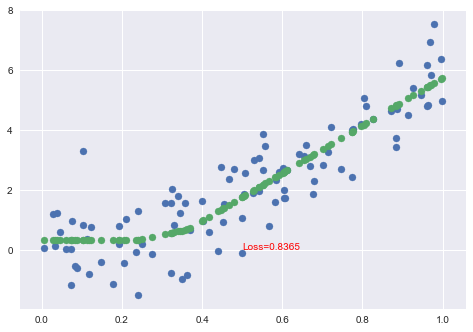

499


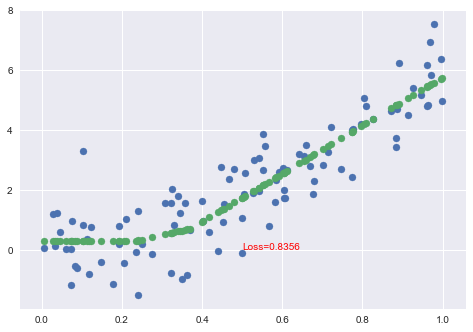

In [20]:
X      = Variable(x1)
y_data = Variable(y)

for epoch in range(500):
    y_pred = ffnet2(X)
    loss = loss_func(y_pred, y_data) 
    optimizer.zero_grad()
    loss.backward()        
    optimizer.step()       
    
    if epoch in [0,99,299,399,499,999]:
        print(epoch)
        plt.cla()
        plt.scatter(x1.data.numpy(), y.data.numpy())
        #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r', lw=1)
        plt.scatter(x1.data.numpy(), y_pred.data.numpy())
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.show()

# Lab 2

**Review modeling attempt 1 - 3 and design a network to improve the existing results.**